In [1]:
# Impoerting necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
df = pd.read_csv("Integrated_Dataset_Gade_Pavan_Kumar_Reddy.csv", parse_dates=['DateTime'])
df.sort_values("DateTime", inplace=True)
df.set_index('DateTime', inplace=True)

In [3]:
# Preview data
df.head()

,Junction,Vehicles,Hour,Day,Weekday,Month,Year,IsWeekend,Lag_1hr,Lag_24hr,Temperature_C,Precipitation_mm,WindSpeed_kmh,Humidity_percent,is_public_holiday,is_sports_event,is_concert,is_public_demonstration
DateTime,,,,,,,,,,,,,,,,,,
2015-11-11 00:00:00,-1.217528,28,-1.661325,-0.627605,-0.495629,1.448992,-2.195716,-0.628768,-0.040999,-0.136390,-0.586602,-0.136252,-0.469148,0.451604,4.971346,-0.160128,-0.132378,-0.057831
2015-11-11 00:00:00,-0.167935,14,-1.661325,-0.627605,-0.495629,1.448992,-2.195716,-0.628768,-0.676555,-0.626200,-0.586602,-0.136252,-0.469148,0.451604,4.971346,-0.160128,-0.132378,-0.057831
2015-11-11 00:00:00,0.881658,6,-1.661325,-0.627605,-0.495629,1.448992,-2.195716,-0.628768,-0.969888,-1.018048,-0.586602,-0.136252,-0.469148,0.451604,4.971346,-0.160128,-0.132378,-0.057831
2015-11-11 01:00:00,0.881658,5,-1.516862,-0.627605,-0.495629,1.448992,-2.195716,-0.628768,-0.823221,-1.067029,-0.660022,-0.136252,-0.493512,0.407193,4.971346,-0.160128,-0.132378,-0.057831
2015-11-11 01:00:00,-1.217528,25,-1.516862,-0.627605,-0.495629,1.448992,-2.195716,-0.628768,0.252335,-0.430276,-0.660022,-0.136252,-0.493512,0.407193,4.971346,-0.160128,-0.132378,-0.057831


In [4]:
# Preview data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43200 entries, 2015-11-11 00:00:00 to 2017-06-30 23:00:00
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Junction                 43200 non-null  float64
 1   Vehicles                 43200 non-null  int64  
 2   Hour                     43200 non-null  float64
 3   Day                      43200 non-null  float64
 4   Weekday                  43200 non-null  float64
 5   Month                    43200 non-null  float64
 6   Year                     43200 non-null  float64
 7   IsWeekend                43200 non-null  float64
 8   Lag_1hr                  43200 non-null  float64
 9   Lag_24hr                 43200 non-null  float64
 10  Temperature_C            43200 non-null  float64
 11  Precipitation_mm         43200 non-null  float64
 12  WindSpeed_kmh            43200 non-null  float64
 13  Humidity_percent         43200 non-null  

In [5]:
# Defining target 
target_col = 'Vehicles'  # Replace with your actual target column name
y = df[target_col]
X = df.drop(columns=[target_col])

In [6]:
# Time series spliting data into train and test
split_idx = int(len(df) * 0.7)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

In [7]:
# Model 1 : Gradient Boosting Tree (XGBoost)
xgb = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

In [8]:
# Creating a time-series aware cross-validation splitter with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(xgb, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

In [9]:
# Predicting and evaluating
y_pred = best_xgb.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

In [10]:
# Printing Evalution metrics
print(f"XGBoost Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

XGBoost Performance:
MAE: 3.15, RMSE: 5.20, R2: 0.96


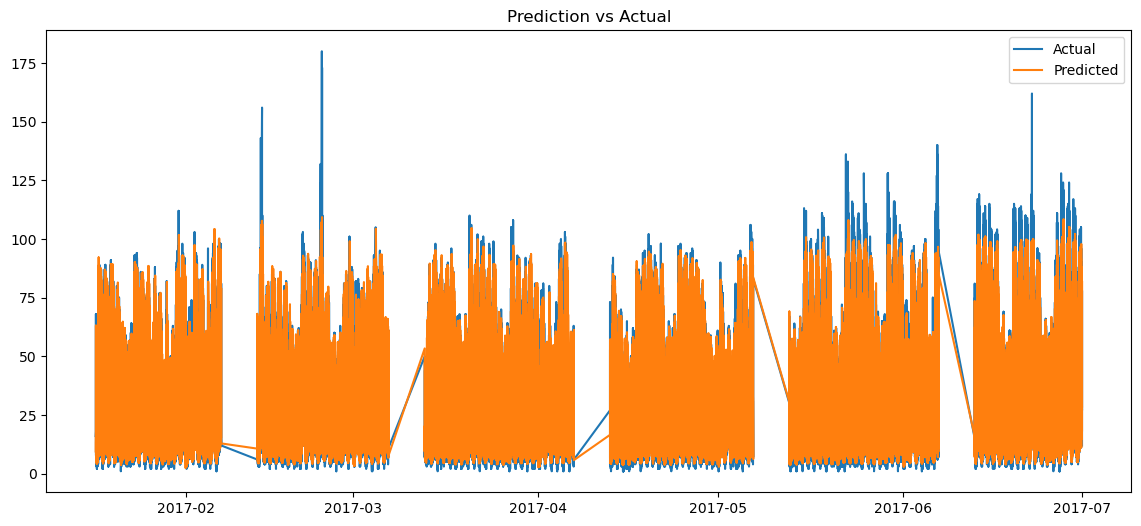

In [11]:
# Visualizations
plt.figure(figsize=(14, 6))
plt.plot(y_val.index, y_val, label='Actual')
plt.plot(y_val.index, y_pred, label='Predicted')
plt.title('Prediction vs Actual')
plt.legend()
plt.show()

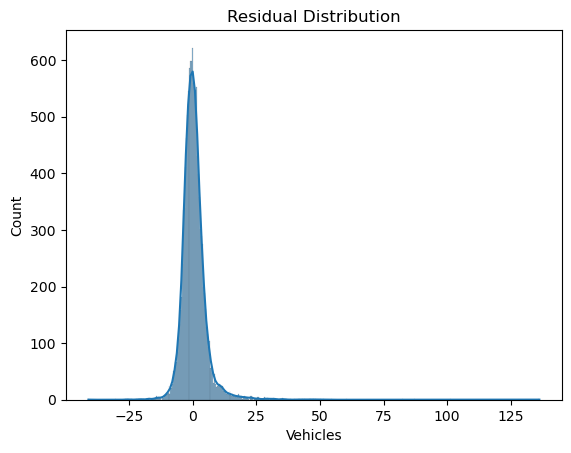

In [12]:
# Residual plot
residuals = y_val - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

In [13]:
# Cross-validation scores for XGBoost
cv_scores = []
for train_idx, test_idx in tscv.split(X):
    X_t, X_v = X.iloc[train_idx], X.iloc[test_idx]
    y_t, y_v = y.iloc[train_idx], y.iloc[test_idx]
    best_xgb.fit(X_t, y_t)
    preds = best_xgb.predict(X_v)
    score = mean_absolute_error(y_v, preds)
    cv_scores.append(score)

In [14]:
# Printing evaluation metrics
print(f"Time-based CV MAE scores: {cv_scores}")
print(f"Average CV MAE: {np.mean(cv_scores):.2f}")

Time-based CV MAE scores: [2.6350020100341904, 2.6836852883961466, 3.0113668450382023, 3.423177317281564, 3.1449231311678885]
Average CV MAE: 2.98


In [15]:
# Model 2 : ARIMA
arima = ARIMA(y_train, order=(5,1,0))
arima_model = arima.fit()
arima_forecast = arima_model.forecast(steps=len(y_val))
print(f"ARIMA RMSE: {np.sqrt(mean_squared_error(y_val, arima_forecast)):.2f}")

ARIMA RMSE: 26.37
